In [106]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf

import pyarrow.parquet as pq

# import plotnine as p9

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [107]:
# Read Parquet file into an Arrow Table
# table1 = pq.read_table("00_data/MSTR.parquet")
# table2 = pq.read_table("00_data/MSTU.parquet")

# table1 = pq.read_table("00_data/TSLA.parquet")
# table2 = pq.read_table("00_data/TSLL.parquet")

# table1 = pq.read_table("00_data/TSLA.parquet")
# table2 = pq.read_table("00_data/TSLS.parquet")

table1 = pq.read_table("00_data/QQQ.parquet")
table2 = pq.read_table("00_data/TQQQ.parquet")

# table1 = pq.read_table("00_data/QQQ.parquet")
# table2 = pq.read_table("00_data/SQQQ.parquet")

# table1 = pq.read_table("00_data/SPY.parquet")
# table2 = pq.read_table("00_data/UPRO.parquet")

# table1 = pq.read_table("00_data/SPY.parquet")
# table2 = pq.read_table("00_data/SPXL.parquet")

# table1 = pq.read_table("00_data/SPY.parquet")
# table2 = pq.read_table("00_data/SPXU.parquet")

# table1 = pq.read_table("00_data/UPRO.parquet")
# table2 = pq.read_table("00_data/SPXL.parquet")

# table1 = pq.read_table("00_data/SPXL.parquet")
# table2 = pq.read_table("00_data/SPXU.parquet")

In [108]:

# Convert Arrow Table back to Pandas DataFrame
df1 = table1.to_pandas()
df2 = table2.to_pandas() # (df2 usually is the leveraged ETF)

In [109]:
# # Extract Ticker symbols directly from df1 and df2, column 'Ticker', unique values
ticker1 = df1['Ticker'].unique()[0]
ticker2 = df2['Ticker'].unique()[0]

In [110]:
df1.head()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
162388,2011-03-23 06:28:00,QQQ,1300876080000,55.50,55.50,55.50,55.50,100.0,55.50,1
162389,2011-03-23 06:35:00,QQQ,1300876500000,55.45,55.45,55.45,55.45,100.0,55.45,1
162390,2011-03-23 06:50:00,QQQ,1300877400000,55.48,55.48,55.48,55.48,100.0,55.48,1
162391,2011-03-23 07:00:00,QQQ,1300878000000,55.48,55.48,55.48,55.48,1000.0,55.48,1
162392,2011-03-23 07:02:00,QQQ,1300878120000,55.51,55.51,55.51,55.51,100.0,55.51,1


In [111]:
print(df1.columns)

"""
T: This is a timestamp in milliseconds (Unix epoch time). 
The value 1760140500000 converts to October 10, 2025, 19:55:00 UTC, which matches the Date column.

N: This is likely the number of trades or number of data points used to calculate the VWAP for that time interval. 
The value 26 suggests 26 individual trades or ticks were aggregated.

The N column provides useful information about data quality. 
Higher values of N typically indicate more liquid trading periods with better VWAP reliability
""";

Index(['Date', 'Ticker', 'T', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP',
       'N'],
      dtype='object')


In [112]:
df1.tail()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
2715573,2025-10-10 19:55:00,QQQ,1760140500000,590.3000,590.46,590.13,590.13,6596.0,590.2830,120
2715574,2025-10-10 19:56:00,QQQ,1760140560000,590.1300,590.13,590.01,590.01,3495.0,590.0912,96
2715575,2025-10-10 19:57:00,QQQ,1760140620000,590.0000,590.05,589.88,590.01,4246.0,590.0132,112
2715576,2025-10-10 19:58:00,QQQ,1760140680000,590.0100,590.10,589.90,590.02,4297.0,590.0034,95
2715577,2025-10-10 19:59:00,QQQ,1760140740000,589.8782,590.00,589.87,589.93,9448.0,589.9504,97


In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553190 entries, 162388 to 2715577
Data columns (total 10 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Ticker  object        
 2   T       int64         
 3   Open    float64       
 4   High    float64       
 5   Low     float64       
 6   Close   float64       
 7   Volume  float64       
 8   VWAP    float64       
 9   N       int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 214.3+ MB


In [114]:
df2.sample(5)

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
1023998,2019-05-09 13:55:00,TQQQ,1557424500000,15.2725,15.2800,15.2600,15.2675,84304.0,15.2653,127
2117196,2024-07-08 05:59:00,TQQQ,1720432740000,81.5300,81.5300,81.5300,81.5300,777.0,81.5394,27
1312656,2020-11-23 18:01:00,TQQQ,1606172460000,36.2375,36.2500,36.2275,36.2275,18732.0,36.2415,32
406818,2014-06-30 13:21:00,TQQQ,1404148860000,3.1317,3.1317,3.1314,3.1314,106584.0,3.1317,11
431463,2014-09-23 12:52:00,TQQQ,1411491120000,3.6371,3.6375,3.6363,3.6363,104400.0,3.6370,43


In [115]:
# Add year, month, day, hour, minute columns for easier filtering on df1 and df2
for df in [df1, df2]:
    df['year'] = pd.to_datetime(df['Date']).dt.year
    df['month'] = pd.to_datetime(df['Date']).dt.month
    df['day'] = pd.to_datetime(df['Date']).dt.day
    df['hour'] = pd.to_datetime(df['Date']).dt.hour
    df['minute'] = pd.to_datetime(df['Date']).dt.minute

In [116]:
# Add a new column 'ym' representing the last day of each month on df1 and df2
for df in [df1, df2]:
    df['ym'] = pd.to_datetime(df['Date']).dt.to_period('M').dt.to_timestamp('M') + pd.offsets.MonthEnd(0)

In [117]:
# Add a new column 'td' representing the trading day within the month on df1 and df2
for df in [df1, df2]:
    df['td'] = df.groupby('ym')['day'].cumcount() + 1 # trading day within the month

In [118]:
# Create trading day counter for minute-level data
for df in [df1, df2]:
    # First, extract just the date (without time) from the datetime
    df['date_only'] = pd.to_datetime(df['Date']).dt.date
    
    # For each year-month group, get unique dates and assign trading day numbers
    df['td'] = df.groupby('ym')['date_only'].transform(
        lambda x: pd.factorize(x)[0] + 1
    )

In [119]:
# Add week number, dt.isocalendar()[1]  # ISO week number
for df in [df1, df2]:
    df['week_number'] = pd.to_datetime(df['Date']).dt.isocalendar().week

In [120]:
# Add day identifier, int to indicate the day of week (0=Monday, 6=Sunday) on df1 and df2
for df in [df1, df2]:
    df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek

In [121]:
# VWAP signal, if Close > VWAP -> 1 else 0 on df1 and df2
for df in [df1, df2]:
    df['vwap_signal'] = np.where(df['Close'] > df['VWAP'], 1, 0)

In [122]:
# Calculate daily simple returns for df1 and df2
# Calculate percentage change of 'Close' within each ticker
df1['ret'] = df1.groupby('Ticker')['Close'].pct_change()
df2['ret'] = df2.groupby('Ticker')['Close'].pct_change()

# fill na values in ret with 0
df1['ret'] = df1['ret'].fillna(0)
df2['ret'] = df2['ret'].fillna(0)

In [123]:
# calculate cumulative returns for df1 and df2
df1['cumret'] = (1 + df1['ret']).cumprod() - 1
df2['cumret'] = (1 + df2['ret']).cumprod() - 1

In [124]:
# Filter last 180 days of data for both df1 and df2
end_date = max(df1['Date'].max(), df2['Date'].max())
start_date = end_date - pd.Timedelta(days=180)
df1_last_180 = df1[df1['Date'] >= start_date]
df2_last_180 = df2[df2['Date'] >= start_date]

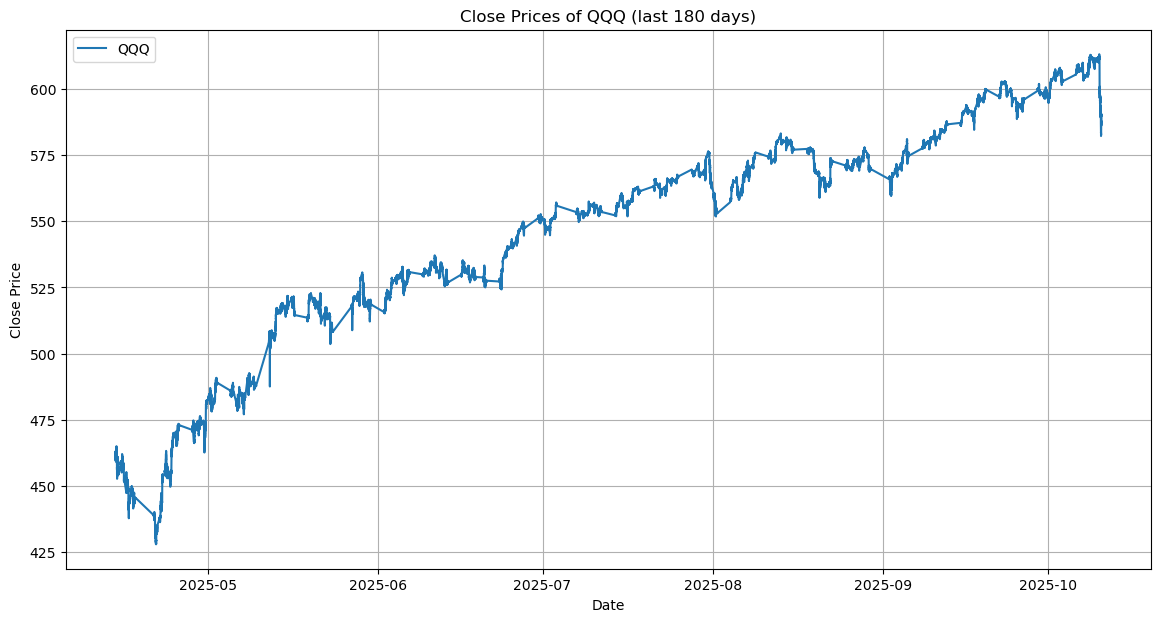

In [125]:
# Plot Close prices for df1_last_180, just for data visualization
plt.figure(figsize=(14, 7))
plt.plot(df1_last_180['Date'], df1_last_180['Close'], label=ticker1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Close Prices of {ticker1} (last 180 days)')
plt.legend()
plt.grid()
plt.show()

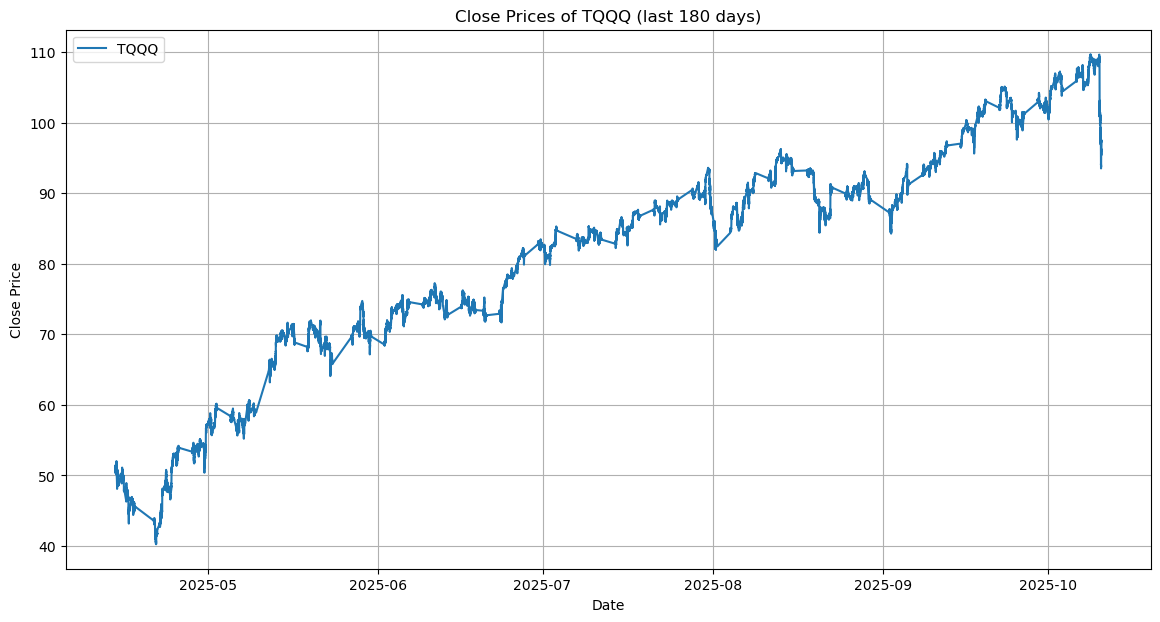

In [126]:
# Plot Close prices for df2_last_180, just for data visualization
plt.figure(figsize=(14, 7))
plt.plot(df2_last_180['Date'], df2_last_180['Close'], label=ticker2)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Close Prices of {ticker2} (last 180 days)')
plt.legend()
plt.grid()
plt.show()

In [127]:
# ----------------------------------------------------------------------
# Return analysis for both tickers
# ----------------------------------------------------------------------

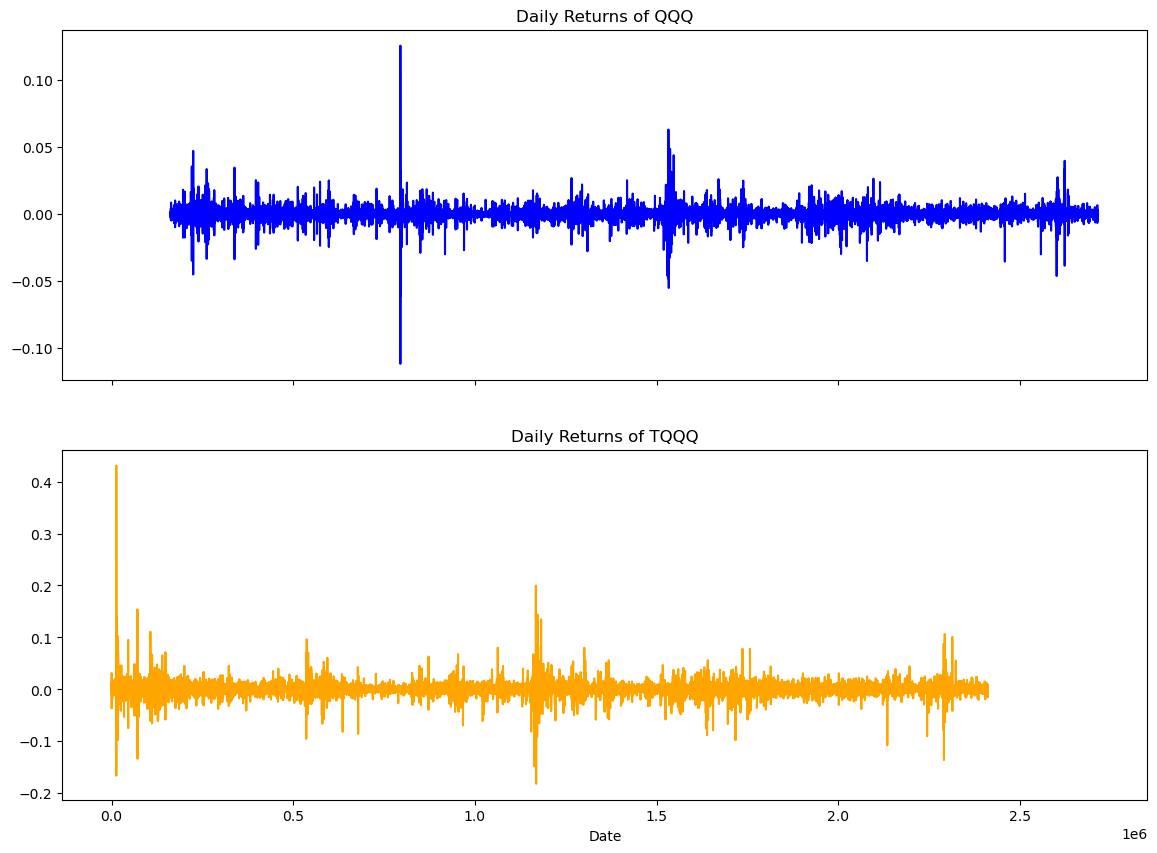

In [128]:
# Plot daily returns for both tickers, in a two subplots figure
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].plot(df1['ret'], label=ticker1, color='blue')
axs[0].set_title(f'Daily Returns of {ticker1}')
axs[1].plot(df2['ret'], label=ticker2, color='orange')
axs[1].set_title(f'Daily Returns of {ticker2}')
plt.xlabel('Date')
plt.show()  

In [129]:
# Filter df1 by min() date of df2.date_only (df2 usually is the leveraged ETF, with shorter history)
min_date_df2 = df2['date_only'].min()
df1 = df1[df1['date_only'] >= min_date_df2]

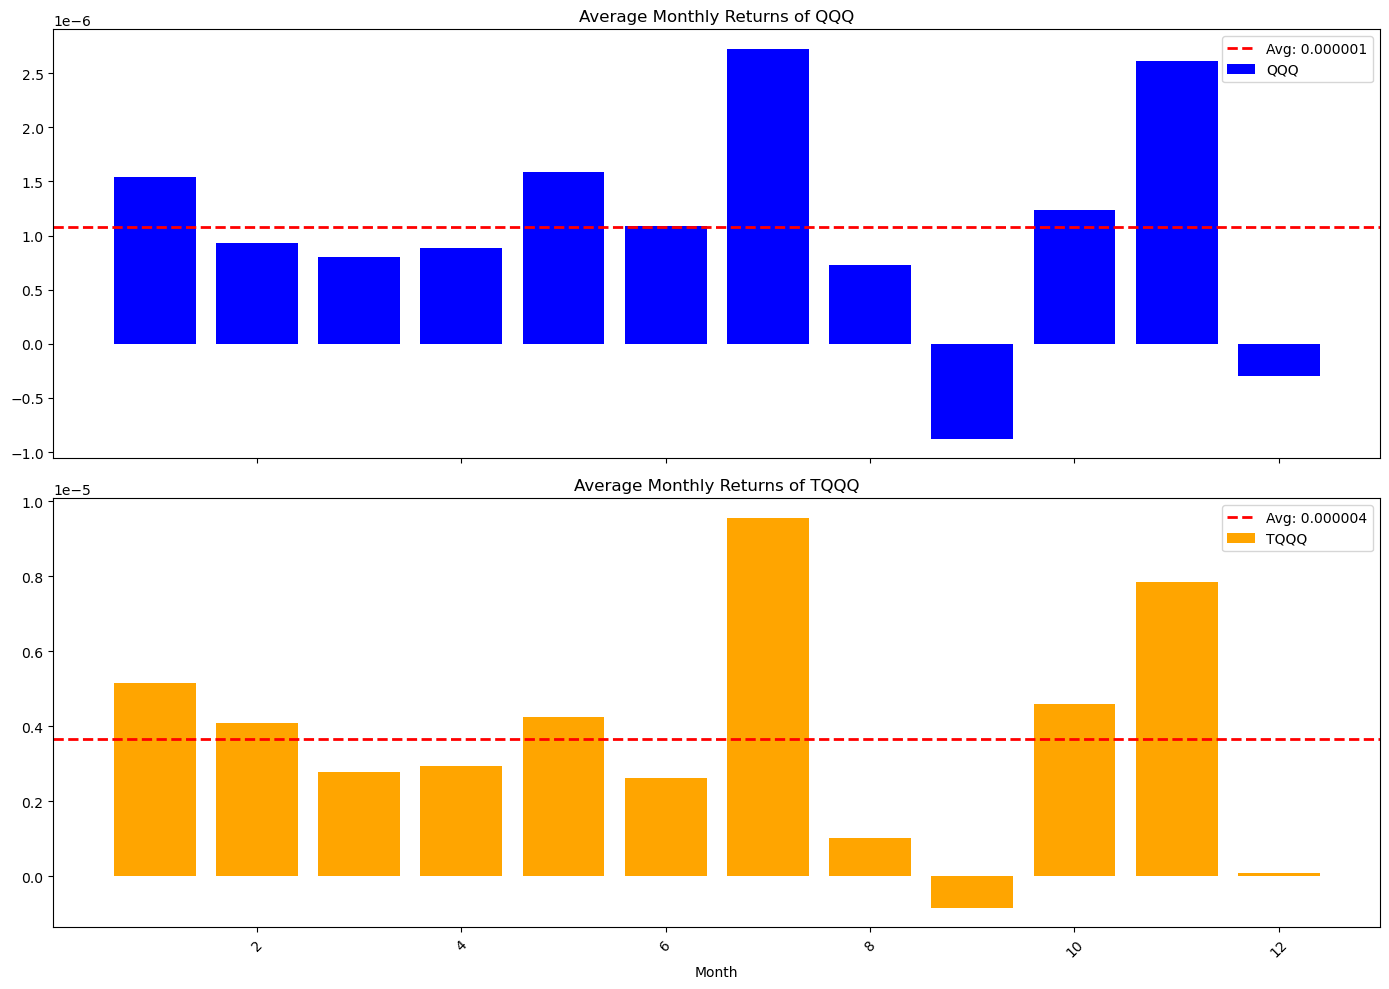

In [130]:
# Group by month and calculate average monthly returns for both tickers
avg_monthly_ret_df1 = df1.groupby('month')['ret'].mean().reset_index()
avg_monthly_ret_df2 = df2.groupby('month')['ret'].mean().reset_index()

# Plot average monthly returns for both tickers, in a two subplots figure, with a bar plot
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_monthly_ret_df1['month'], avg_monthly_ret_df1['ret'], label=ticker1, color='blue')
axs[0].axhline(y=avg_monthly_ret_df1['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_monthly_ret_df1["ret"].mean():.6f}')
axs[0].set_title(f'Average Monthly Returns of {ticker1}')
axs[0].legend()
axs[1].bar(avg_monthly_ret_df2['month'], avg_monthly_ret_df2['ret'], label=ticker2, color='orange')
axs[1].axhline(y=avg_monthly_ret_df2['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_monthly_ret_df2["ret"].mean():.6f}')
axs[1].set_title(f'Average Monthly Returns of {ticker2}')
axs[1].legend()
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

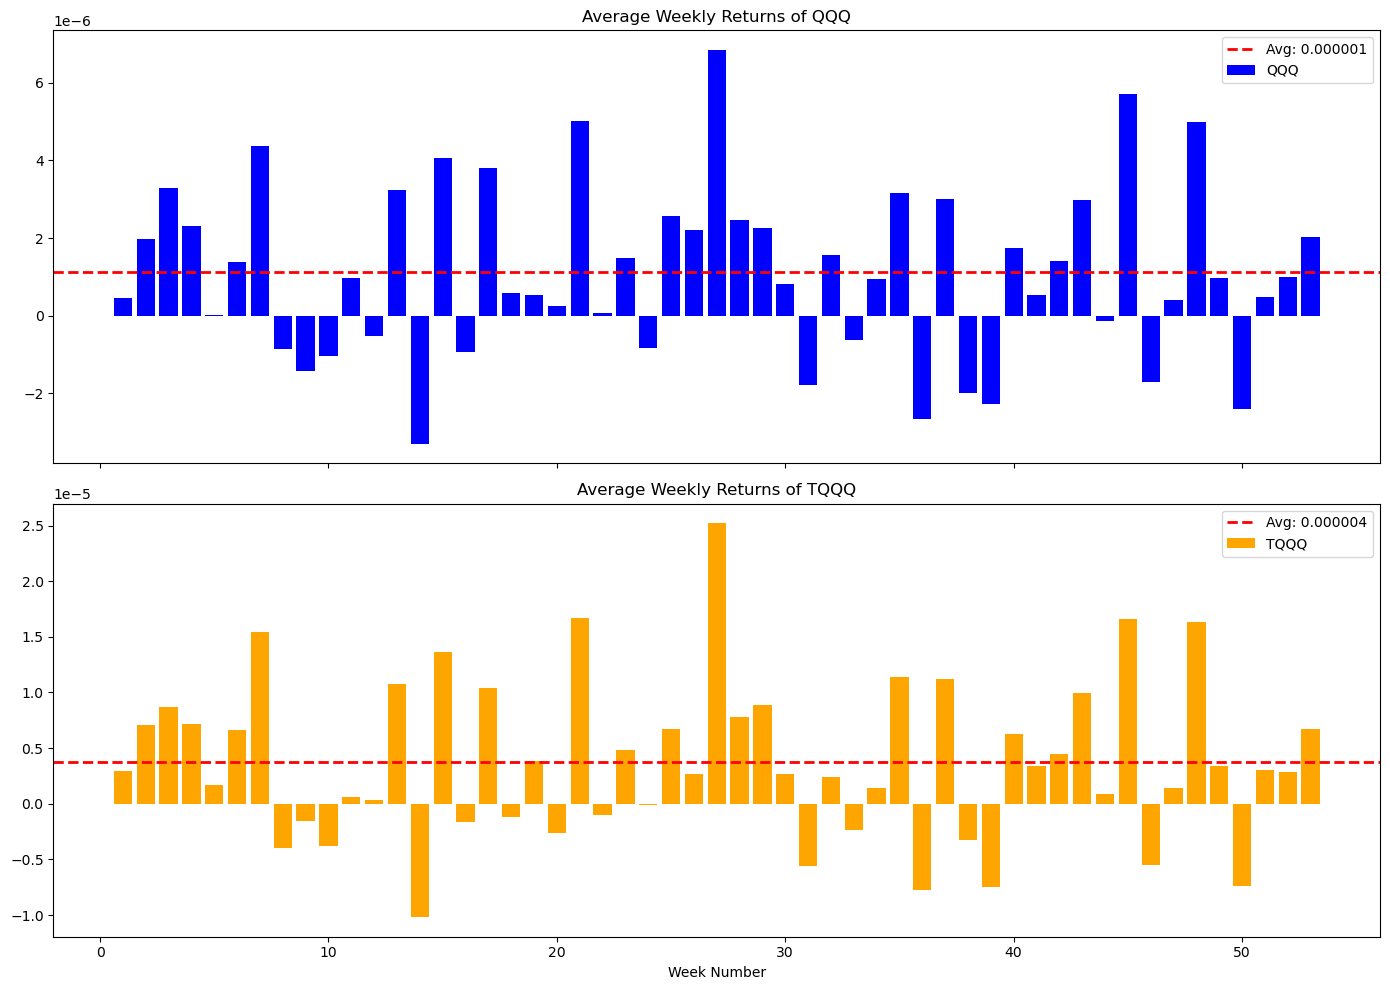

In [131]:
# Group by week_number and calculate average weekly returns for both tickers
avg_weekly_ret_df1 = df1.groupby('week_number')['ret'].mean().reset_index()
avg_weekly_ret_df2 = df2.groupby('week_number')['ret'].mean().reset_index()

# Plot average weekly returns for both tickers, in a two subplots figure, with a bar plot
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_weekly_ret_df1['week_number'], avg_weekly_ret_df1['ret'], label=ticker1, color='blue')
axs[0].axhline(y=avg_weekly_ret_df1['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_weekly_ret_df1["ret"].mean():.6f}')
axs[0].set_title(f'Average Weekly Returns of {ticker1}')
axs[0].legend()
axs[1].bar(avg_weekly_ret_df2['week_number'], avg_weekly_ret_df2['ret'], label=ticker2, color='orange')
axs[1].axhline(y=avg_weekly_ret_df2['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_weekly_ret_df2["ret"].mean():.6f}')
axs[1].set_title(f'Average Weekly Returns of {ticker2}')
axs[1].legend()
plt.xlabel('Week Number')
plt.tight_layout()
plt.show()

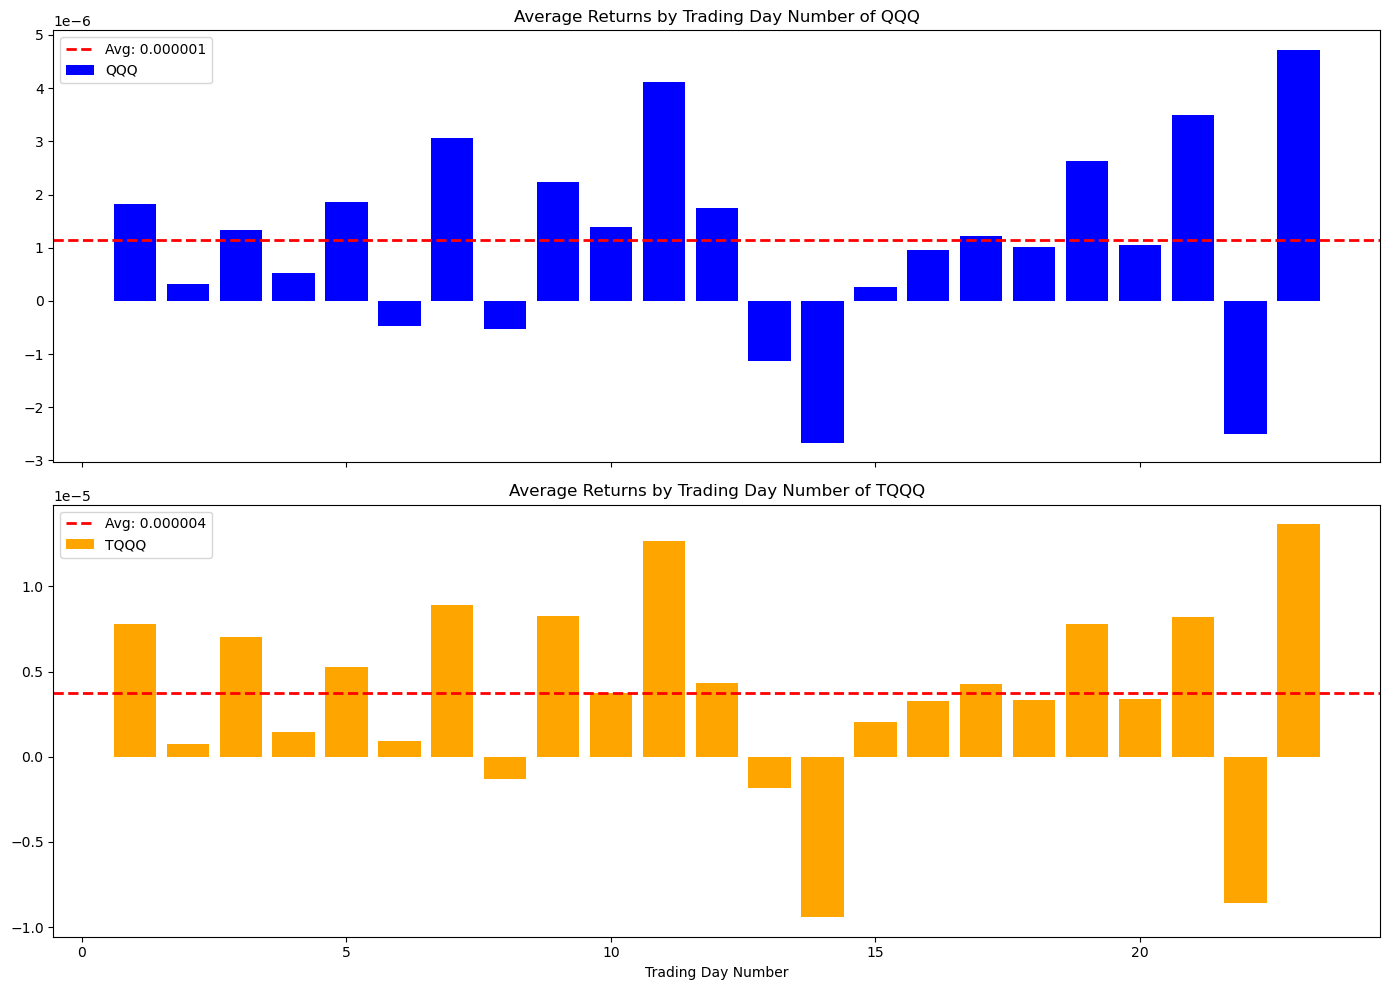

In [132]:
# Group by the trading day number and take the mean of returns for df1 and df2
avg_ret_by_td_df1 = df1.groupby('td')['ret'].mean().reset_index()
avg_ret_by_td_df2 = df2.groupby('td')['ret'].mean().reset_index()

# Plot average returns by trading day number for both tickers (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_ret_by_td_df1['td'], avg_ret_by_td_df1['ret'], label=ticker1, color='blue')
axs[0].axhline(y=avg_ret_by_td_df1['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_td_df1["ret"].mean():.6f}')
axs[0].set_title(f'Average Returns by Trading Day Number of {ticker1}')
axs[0].legend()
axs[1].bar(avg_ret_by_td_df2['td'], avg_ret_by_td_df2['ret'], label=ticker2, color='orange')
axs[1].axhline(y=avg_ret_by_td_df2['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_td_df2["ret"].mean():.6f}')
axs[1].set_title(f'Average Returns by Trading Day Number of {ticker2}')
axs[1].legend()
plt.xlabel('Trading Day Number')
plt.tight_layout()
plt.show()

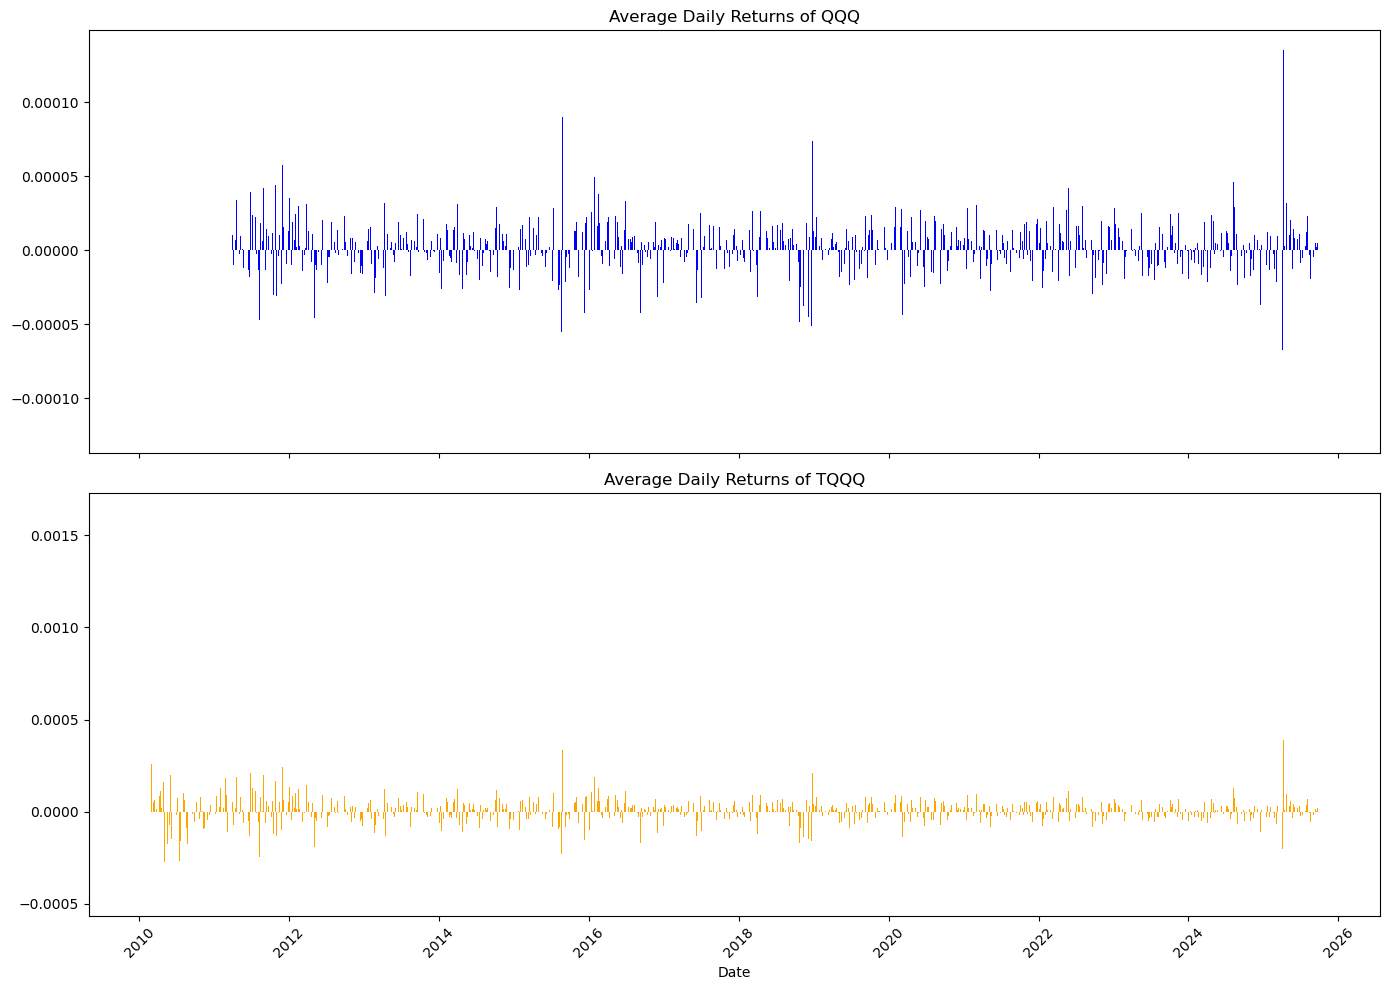

In [133]:
# Calculate average daily returns of df1 and df2, grouped by date
avg_daily_ret_df1_day = df1.groupby('date_only')['ret'].mean().reset_index()
avg_daily_ret_df2_day = df2.groupby('date_only')['ret'].mean().reset_index()

# Plot average daily returns for both tickers, in a two subplots figure, with a bar plot
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_daily_ret_df1_day['date_only'], avg_daily_ret_df1_day['ret'], label=ticker1, color='blue')
axs[0].set_title(f'Average Daily Returns of {ticker1}')
axs[1].bar(avg_daily_ret_df2_day['date_only'], avg_daily_ret_df2_day['ret'], label=ticker2, color='orange')
axs[1].set_title(f'Average Daily Returns of {ticker2}')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

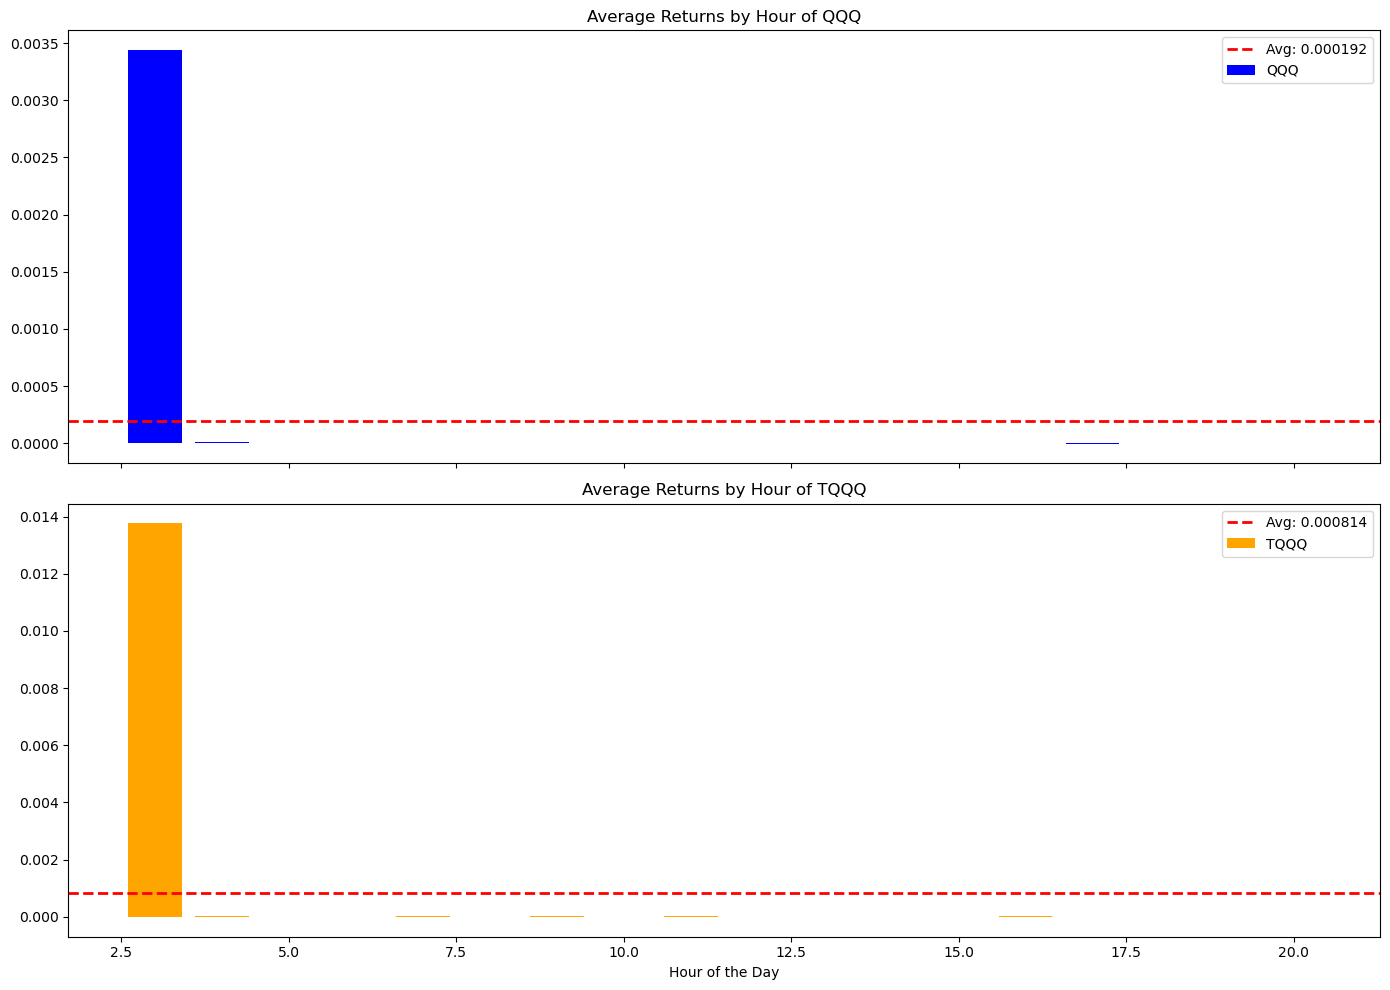

In [134]:
# Group by hour and take the mean of returns for df1 and df2
avg_ret_by_hour_df1 = df1.groupby('hour')['ret'].mean().reset_index()
avg_ret_by_hour_df2 = df2.groupby('hour')['ret'].mean().reset_index()

# Plot average returns by hour for both tickers (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_ret_by_hour_df1['hour'], avg_ret_by_hour_df1['ret'], label=ticker1, color='blue')
axs[0].axhline(y=avg_ret_by_hour_df1['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_hour_df1["ret"].mean():.6f}')
axs[0].set_title(f'Average Returns by Hour of {ticker1}')
axs[0].legend()
axs[1].bar(avg_ret_by_hour_df2['hour'], avg_ret_by_hour_df2['ret'], label=ticker2, color='orange')
axs[1].axhline(y=avg_ret_by_hour_df2['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_hour_df2["ret"].mean():.6f}')
axs[1].set_title(f'Average Returns by Hour of {ticker2}')
axs[1].legend()
plt.xlabel('Hour of the Day')
plt.tight_layout()
plt.show()

In [ ]:
"""
QQQ and TQQQ have wrong 'Hour of the Day' values, to check and fix it later
""";

In [135]:
"""
For MSTR and MSTU, the highest average returns tend to occur before opening hours.
This should be further investigated to understand the underlying causes.

This highest average returns, happens with a very low volume, as it is shown later in the notebook.

Overnight returns (pre/after market) tend to show higher average returns for both tickers.
Intraday returns (during market hours) tend to show lower average returns for both tickers.

""";


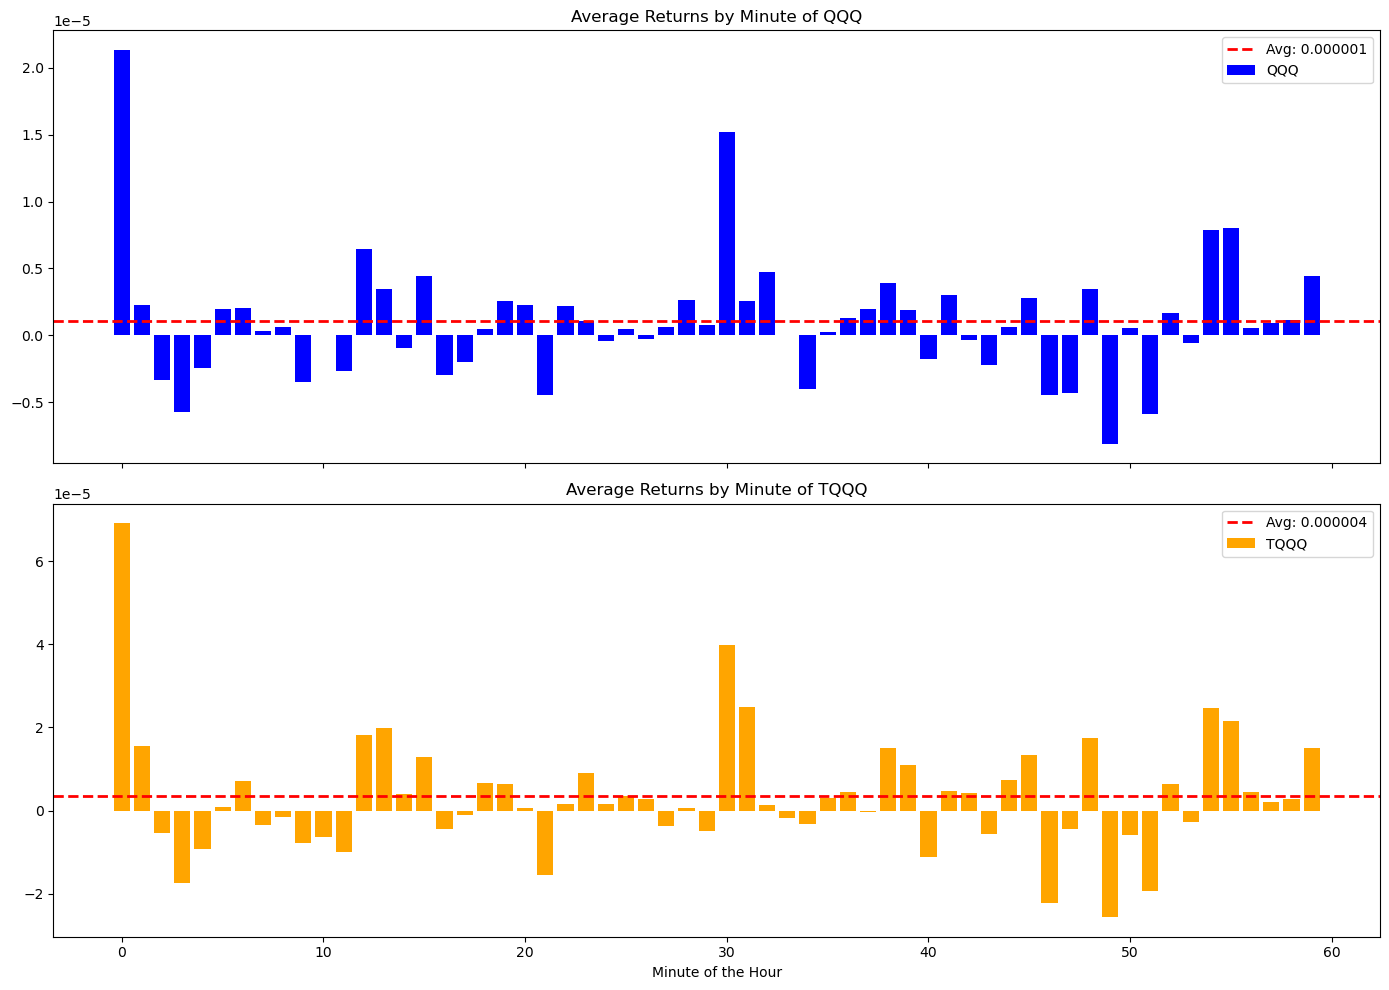

In [136]:
# Group by minute and take the mean of returns for df1 and df2
avg_ret_by_minute_df1 = df1.groupby('minute')['ret'].mean().reset_index()
avg_ret_by_minute_df2 = df2.groupby('minute')['ret'].mean().reset_index()

# Plot average returns by minute for both tickers (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_ret_by_minute_df1['minute'], avg_ret_by_minute_df1['ret'], label=ticker1, color='blue')
axs[0].axhline(y=avg_ret_by_minute_df1['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_minute_df1["ret"].mean():.6f}')
axs[0].set_title(f'Average Returns by Minute of {ticker1}')
axs[0].legend()
axs[1].bar(avg_ret_by_minute_df2['minute'], avg_ret_by_minute_df2['ret'], label=ticker2, color='orange')
axs[1].axhline(y=avg_ret_by_minute_df2['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_minute_df2["ret"].mean():.6f}')
axs[1].set_title(f'Average Returns by Minute of {ticker2}')
axs[1].legend()
plt.xlabel('Minute of the Hour')
plt.tight_layout()
plt.show()

In [137]:
# Filter df1 and df2 for market hours only (9:30 to 16:00)
market_hours_df1 = df1[(df1['hour'] >= 9) & ((df1['hour'] < 16) | ((df1['hour'] == 9) & (df1['minute'] >= 30)))]
market_hours_df2 = df2[(df2['hour'] >= 9) & ((df2['hour'] < 16) | ((df2['hour'] == 9) & (df2['minute'] >= 30)))]

# Filter df1 and df2 for first hour of market only
first_hour_df1 = df1[((df1['hour'] == 9) & (df1['minute'] >= 30)) | (df1['hour'] == 10)]
first_hour_df2 = df2[((df2['hour'] == 9) & (df2['minute'] >= 30)) | (df2['hour'] == 10)]

# Filter df1 and df2 for last hour of market only
last_hour_df1 = df1[(df1['hour'] == 15)]
last_hour_df2 = df2[(df2['hour'] == 15)]

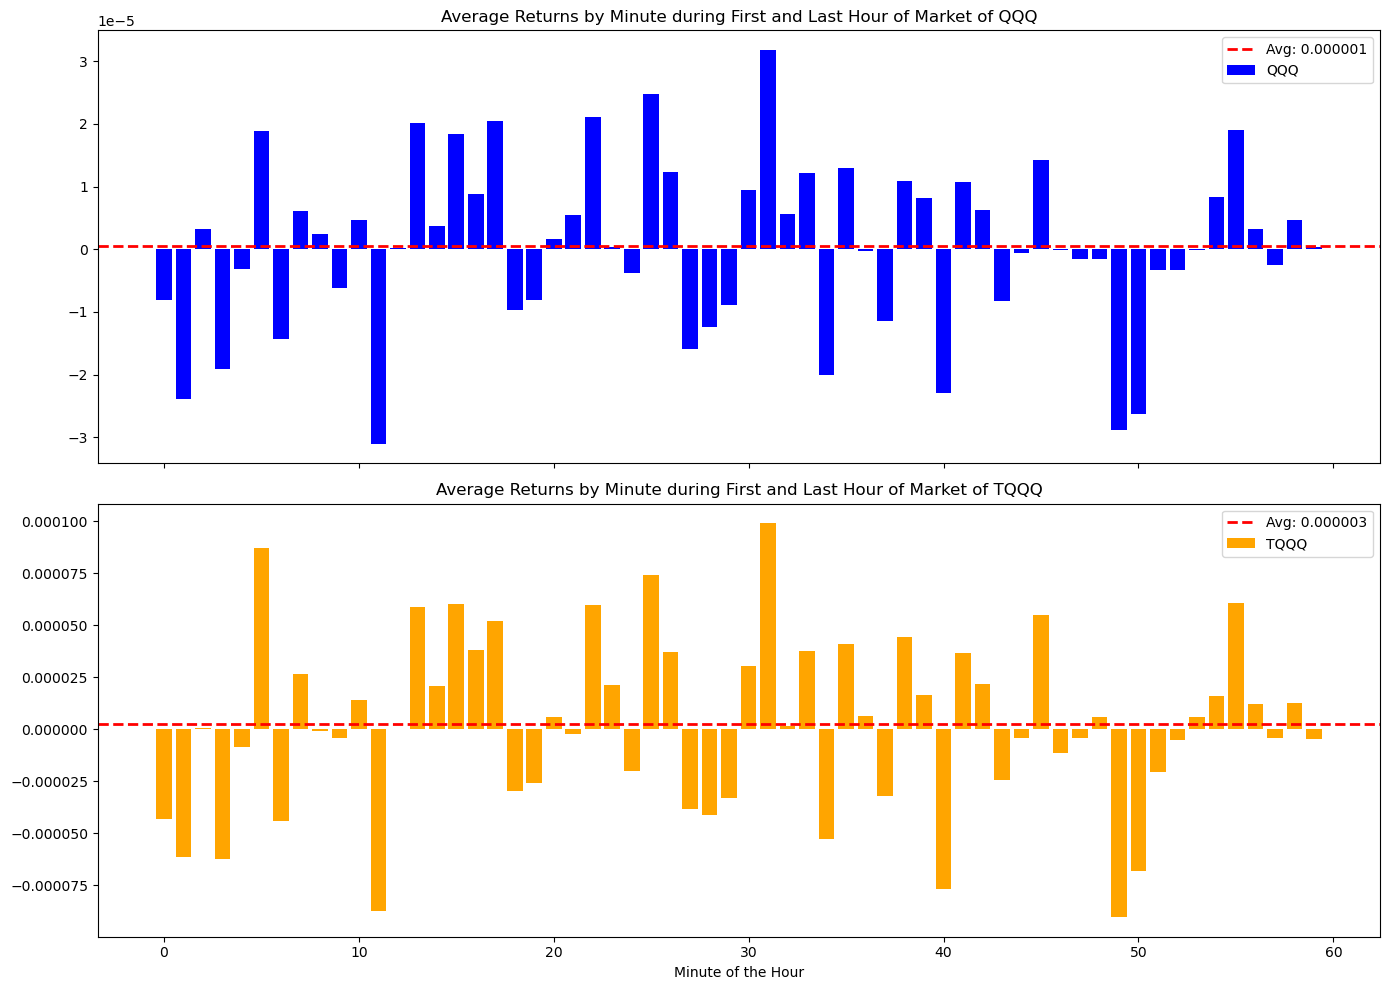

In [138]:
# Group by minute and take the mean of returns for first_hour_df1 and first_hour_df2
avg_ret_by_minute_fh_df1 = first_hour_df1.groupby('minute')['ret'].mean().reset_index()
avg_ret_by_minute_fh_df2 = first_hour_df2.groupby('minute')['ret'].mean().reset_index()

# Plot average returns by minute for both tickers during first and last hour of market (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_ret_by_minute_fh_df1['minute'], avg_ret_by_minute_fh_df1['ret'], label=ticker1, color='blue')
axs[0].axhline(y=avg_ret_by_minute_fh_df1['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_minute_fh_df1["ret"].mean():.6f}')
axs[0].set_title(f'Average Returns by Minute during First and Last Hour of Market of {ticker1}')
axs[0].legend()
axs[1].bar(avg_ret_by_minute_fh_df2['minute'], avg_ret_by_minute_fh_df2['ret'], label=ticker2, color='orange')
axs[1].axhline(y=avg_ret_by_minute_fh_df2['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_minute_fh_df2["ret"].mean():.6f}')
axs[1].set_title(f'Average Returns by Minute during First and Last Hour of Market of {ticker2}')
axs[1].legend()
plt.xlabel('Minute of the Hour')
plt.tight_layout()
plt.show()

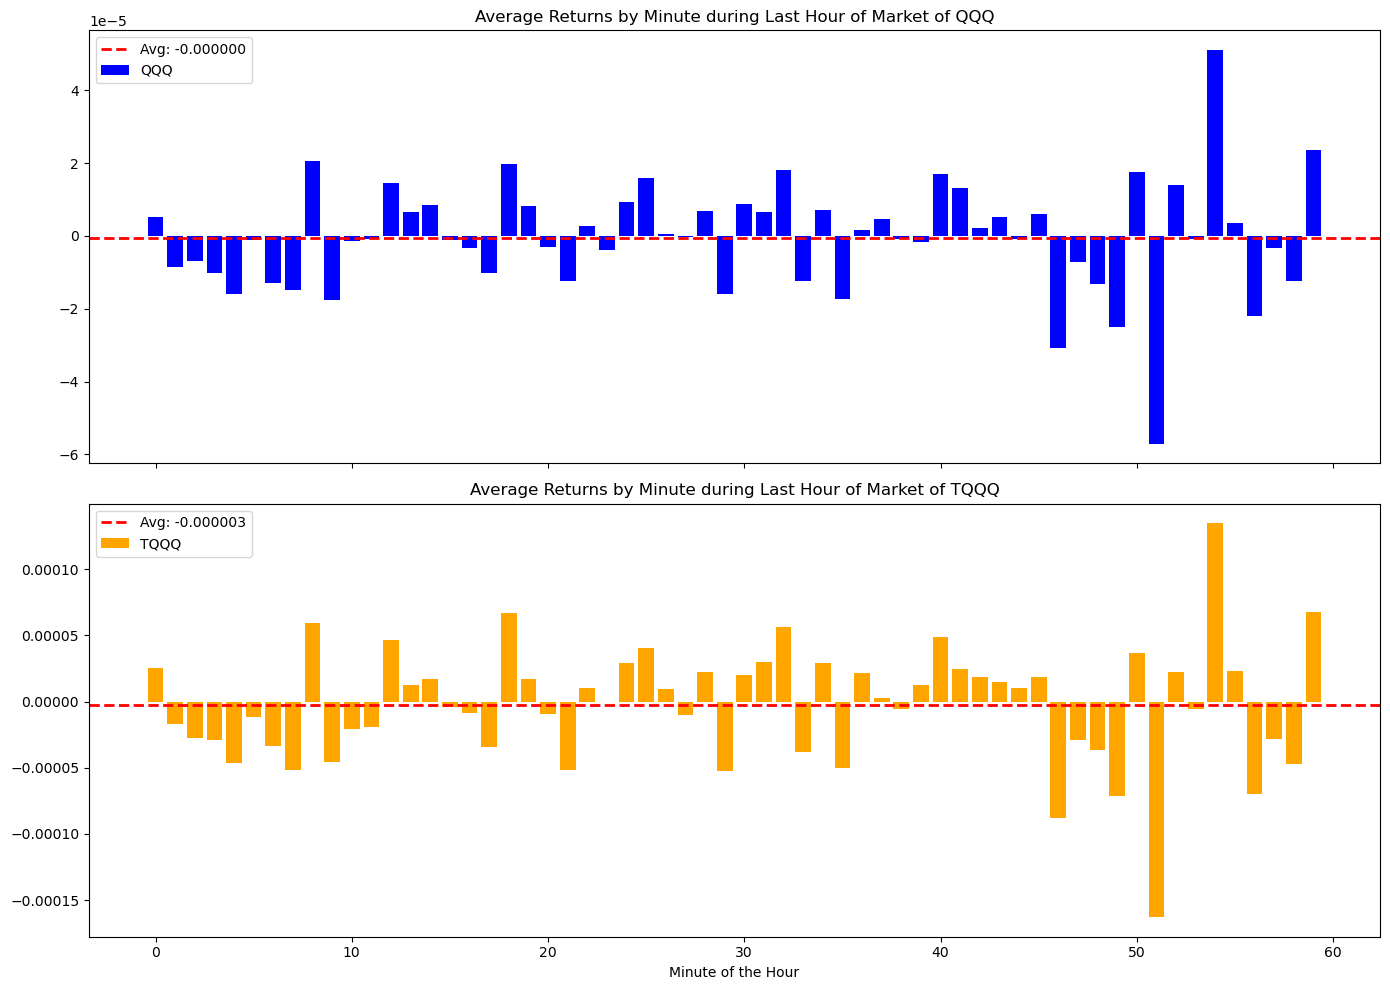

In [139]:
# Group by minute and take the mean of returns for last_hour_df1 and last_hour_df2
avg_ret_by_minute_lh_df1 = last_hour_df1.groupby('minute')['ret'].mean().reset_index()
avg_ret_by_minute_lh_df2 = last_hour_df2.groupby('minute')['ret'].mean().reset_index()

# Plot average returns by minute for both tickers during last hour of market (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_ret_by_minute_lh_df1['minute'], avg_ret_by_minute_lh_df1['ret'], label=ticker1, color='blue')
axs[0].axhline(y=avg_ret_by_minute_lh_df1['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_minute_lh_df1["ret"].mean():.6f}')
axs[0].set_title(f'Average Returns by Minute during Last Hour of Market of {ticker1}')
axs[0].legend()
axs[1].bar(avg_ret_by_minute_lh_df2['minute'], avg_ret_by_minute_lh_df2['ret'], label=ticker2, color='orange')
axs[1].axhline(y=avg_ret_by_minute_lh_df2['ret'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_ret_by_minute_lh_df2["ret"].mean():.6f}')
axs[1].set_title(f'Average Returns by Minute during Last Hour of Market of {ticker2}')
axs[1].legend()
plt.xlabel('Minute of the Hour')
plt.tight_layout()
plt.show()

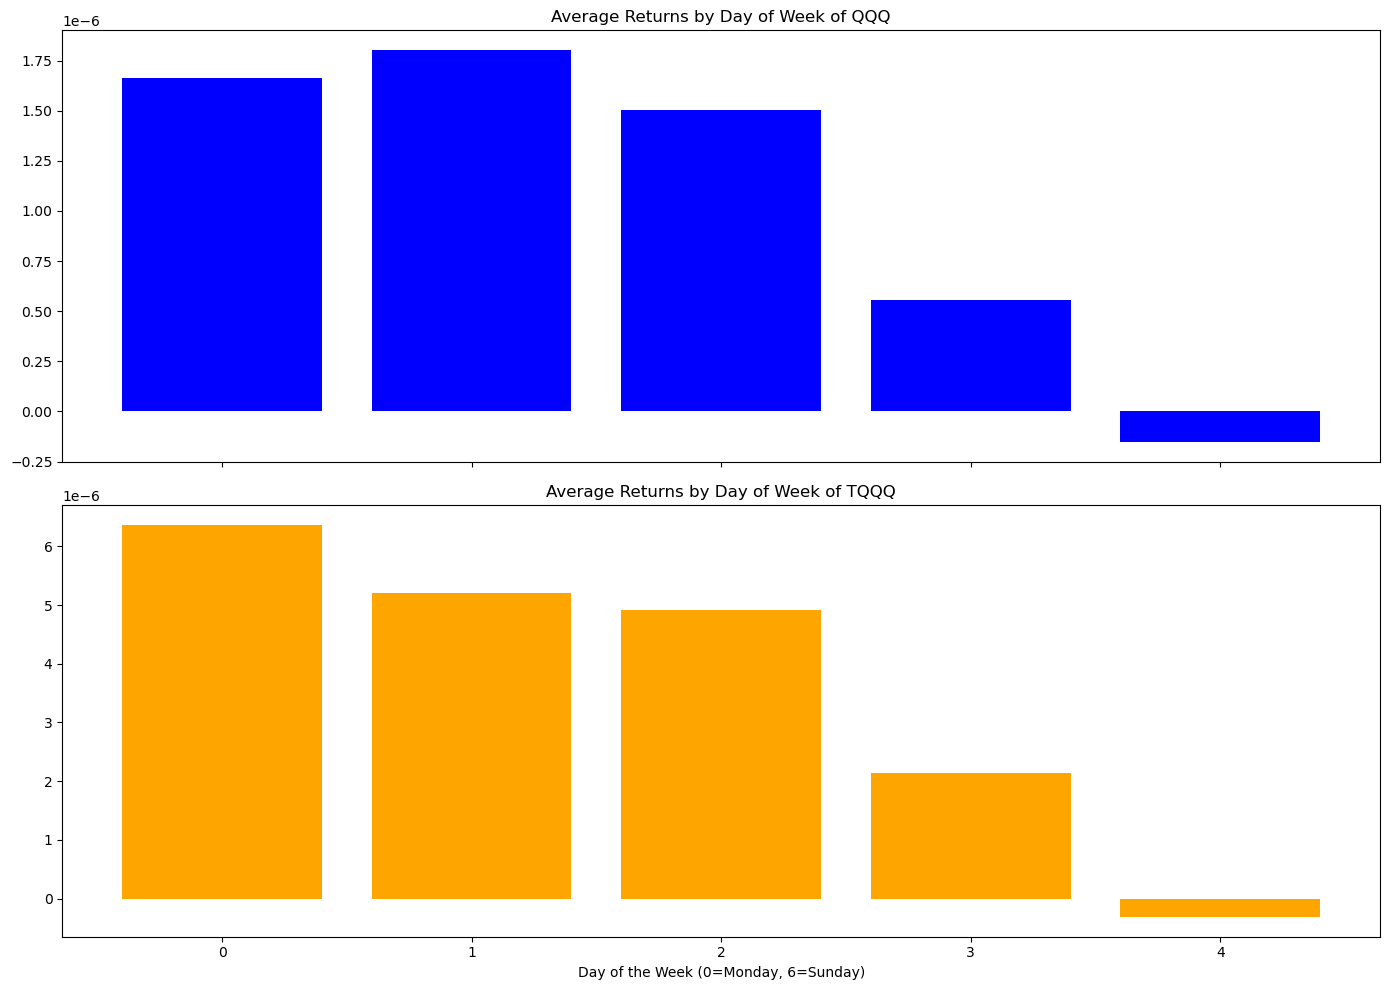

In [140]:
# Group by day_of_week and take the mean of returns for df1 and df2
avg_ret_by_dayofweek_df1 = df1.groupby('day_of_week')['ret'].mean().reset_index()
avg_ret_by_dayofweek_df2 = df2.groupby('day_of_week')['ret'].mean().reset_index()

# Plot average returns by day_of_week for both tickers (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_ret_by_dayofweek_df1['day_of_week'], avg_ret_by_dayofweek_df1['ret'], label=ticker1, color='blue')
axs[0].set_title(f'Average Returns by Day of Week of {ticker1}')
axs[1].bar(avg_ret_by_dayofweek_df2['day_of_week'], avg_ret_by_dayofweek_df2['ret'], label=ticker2, color='orange')
axs[1].set_title(f'Average Returns by Day of Week of {ticker2}')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.tight_layout()
plt.show()

In [141]:
# Group df1 and df2 by date_only and calculate daily returns
df1_daily = df1.groupby('date_only').agg({'Close': 'last'}).reset_index()
df1_daily['ret'] = df1_daily['Close'].pct_change().fillna(0)
df1_daily['cumret'] = (1 + df1_daily['ret']).cumprod() - 1
df2_daily = df2.groupby('date_only').agg({'Close': 'last'}).reset_index()
df2_daily['ret'] = df2_daily['Close'].pct_change().fillna(0)
df2_daily['cumret'] = (1 + df2_daily['ret']).cumprod() - 1

# Join df1_daily and df2_daily on date_only
df_joined = df1_daily.merge(df2_daily, on='date_only', suffixes=(f'_{ticker1}', f'_{ticker2}'))

# Display first few rows of df_joined
df_joined.head()

,date_only,Close_QQQ,ret_QQQ,cumret_QQQ,Close_TQQQ,ret_TQQQ,cumret_TQQQ
0,2011-03-23,55.66,0.000000,0.000000,0.8086,0.014682,0.869595
1,2011-03-24,56.89,0.022098,0.022098,0.8630,0.067277,0.995376
2,2011-03-25,56.94,0.000879,0.022997,0.8645,0.001738,0.998844
3,2011-03-28,56.40,-0.009484,0.013295,0.8405,-0.027762,0.943353
4,2011-03-29,57.00,0.010638,0.024075,0.8672,0.031767,1.005087


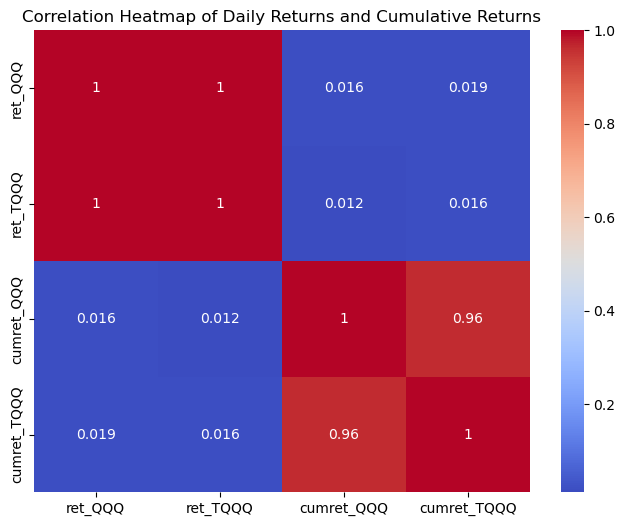

In [142]:
# Plot correlation heatmap of df_joined
plt.figure(figsize=(8, 6))
sns.heatmap(df_joined[[f'ret_{ticker1}', f'ret_{ticker2}', f'cumret_{ticker1}', f'cumret_{ticker2}']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Daily Returns and Cumulative Returns')
plt.show()

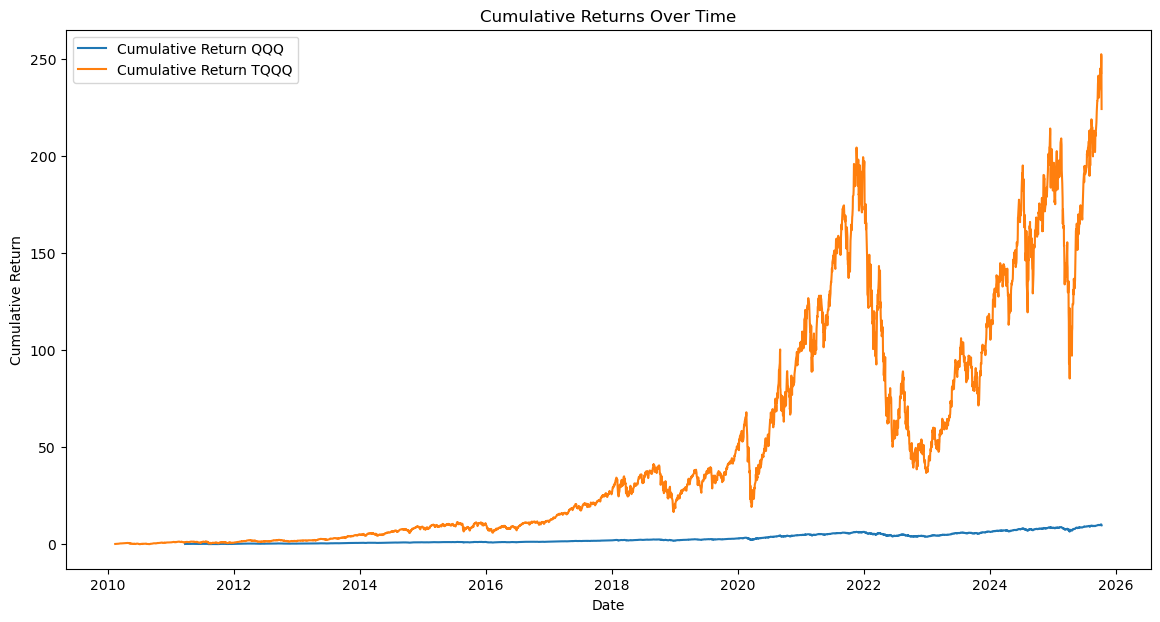

In [143]:
# PLot df1_daily.cumret and df2_daily.cumret for visualization purposes
plt.figure(figsize=(14, 7))
plt.plot(df1_daily['date_only'], df1_daily['cumret'], label=f'Cumulative Return {ticker1}')
plt.plot(df2_daily['date_only'], df2_daily['cumret'], label=f'Cumulative Return {ticker2}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns Over Time')
plt.legend()
plt.show()

In [144]:
# ----------------------------------------------------------------------
# Volume analysis for both tickers
# ----------------------------------------------------------------------

In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553190 entries, 162388 to 2715577
Data columns (total 23 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Date         datetime64[ns]
 1   Ticker       object        
 2   T            int64         
 3   Open         float64       
 4   High         float64       
 5   Low          float64       
 6   Close        float64       
 7   Volume       float64       
 8   VWAP         float64       
 9   N            int64         
 10  year         int64         
 11  month        int64         
 12  day          int64         
 13  hour         int64         
 14  minute       int64         
 15  ym           datetime64[ns]
 16  td           int64         
 17  date_only    object        
 18  week_number  UInt32        
 19  day_of_week  int64         
 20  vwap_signal  int32         
 21  ret          float64       
 22  cumret       float64       
dtypes: UInt32(1), datetime64[ns](2), float64(8), int32(1

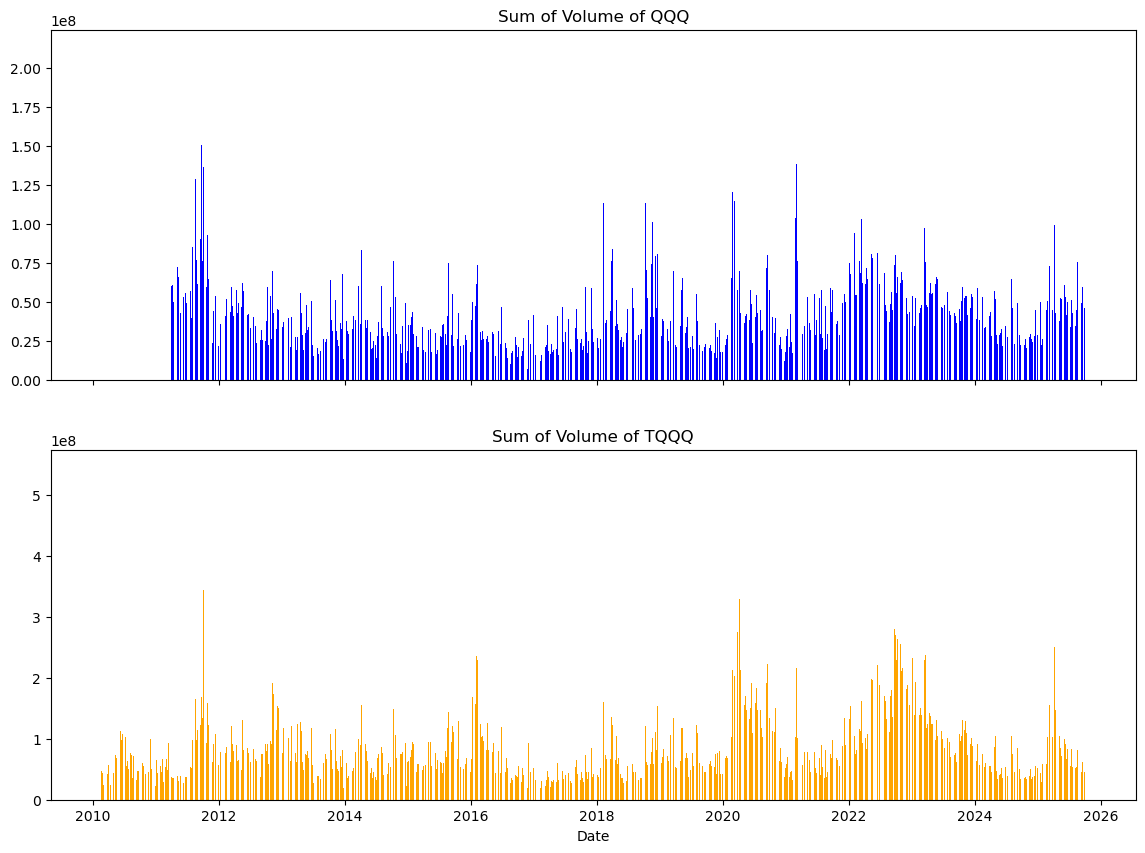

In [146]:
# Group df1 and df2 by date_only and calculate the sum of Volume
avg_vol_df1 = df1.groupby('date_only')['Volume'].sum().reset_index()
avg_vol_df2 = df2.groupby('date_only')['Volume'].sum().reset_index()

# Plot sum of Volume for both tickers (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_vol_df1['date_only'], avg_vol_df1['Volume'], label=ticker1, color='blue')
axs[0].set_title(f'Sum of Volume of {ticker1}')
axs[1].bar(avg_vol_df2['date_only'], avg_vol_df2['Volume'], label=ticker2, color='orange')
axs[1].set_title(f'Sum of Volume of {ticker2}')
plt.xlabel('Date')
plt.show()

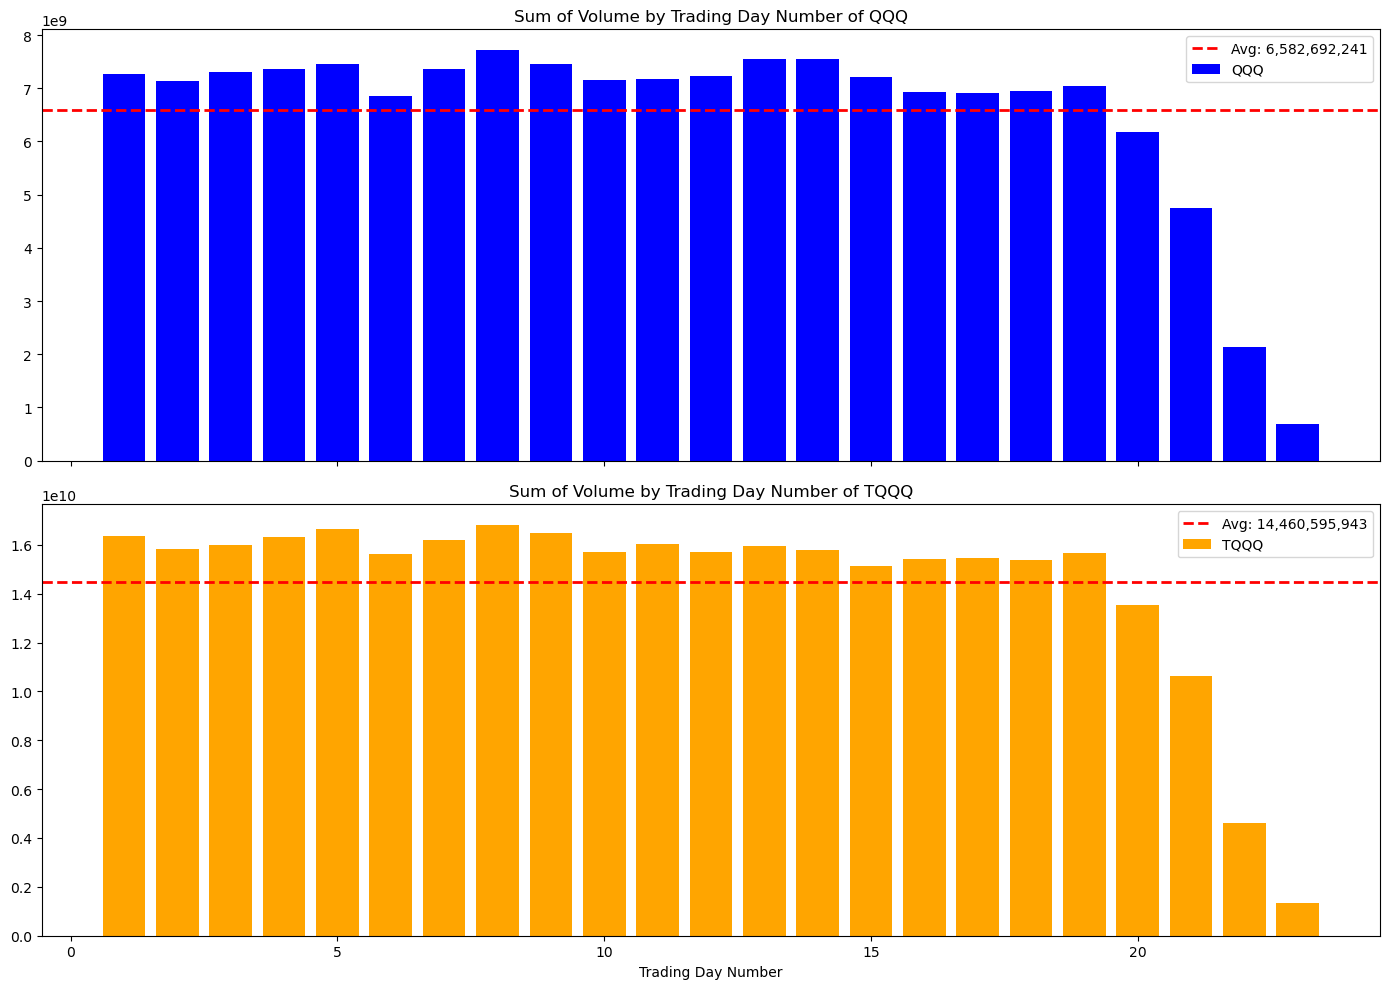

In [147]:
# Group df1 and df2 by td and calculate the sum of Volume
avg_vol_by_td_df1 = df1.groupby('td')['Volume'].sum().reset_index()
avg_vol_by_td_df2 = df2.groupby('td')['Volume'].sum().reset_index()

# Plot sum of Volume by trading day number for both tickers (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_vol_by_td_df1['td'], avg_vol_by_td_df1['Volume'], label=ticker1, color='blue')
axs[0].axhline(y=avg_vol_by_td_df1['Volume'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_vol_by_td_df1["Volume"].mean():,.0f}')
axs[0].set_title(f'Sum of Volume by Trading Day Number of {ticker1}')
axs[0].legend()
axs[1].bar(avg_vol_by_td_df2['td'], avg_vol_by_td_df2['Volume'], label=ticker2, color='orange')
axs[1].axhline(y=avg_vol_by_td_df2['Volume'].mean(), color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_vol_by_td_df2["Volume"].mean():,.0f}')
axs[1].set_title(f'Sum of Volume by Trading Day Number of {ticker2}')
axs[1].legend()
plt.xlabel('Trading Day Number')
plt.tight_layout()
plt.show()

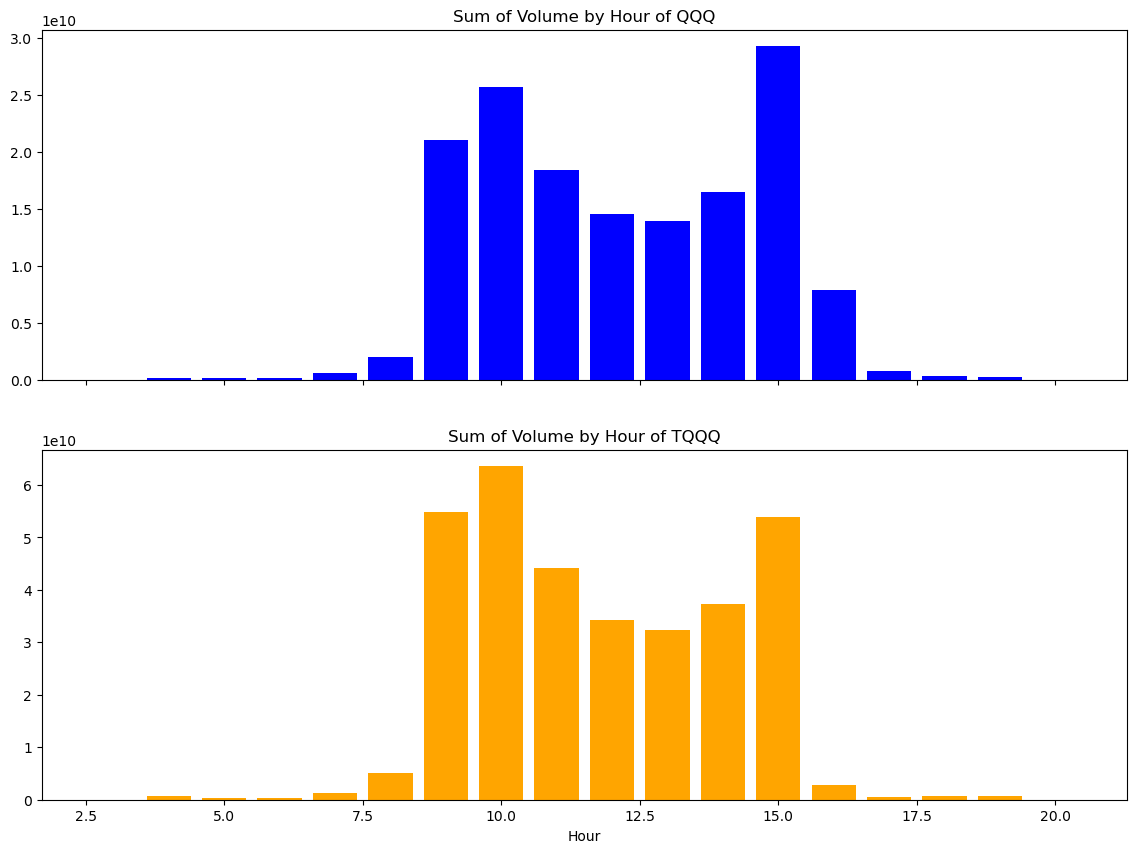

In [148]:
# Group df1 and df2 by hour and calculate the sum of Volume
avg_vol_by_hour_df1 = df1.groupby('hour')['Volume'].sum().reset_index()
avg_vol_by_hour_df2 = df2.groupby('hour')['Volume'].sum().reset_index()

# Plot sum of Volume by hour for both tickers (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_vol_by_hour_df1['hour'], avg_vol_by_hour_df1['Volume'], label=ticker1, color='blue')
axs[0].set_title(f'Sum of Volume by Hour of {ticker1}')
axs[1].bar(avg_vol_by_hour_df2['hour'], avg_vol_by_hour_df2['Volume'], label=ticker2, color='orange')
axs[1].set_title(f'Sum of Volume by Hour of {ticker2}')
plt.xlabel('Hour')
plt.show()

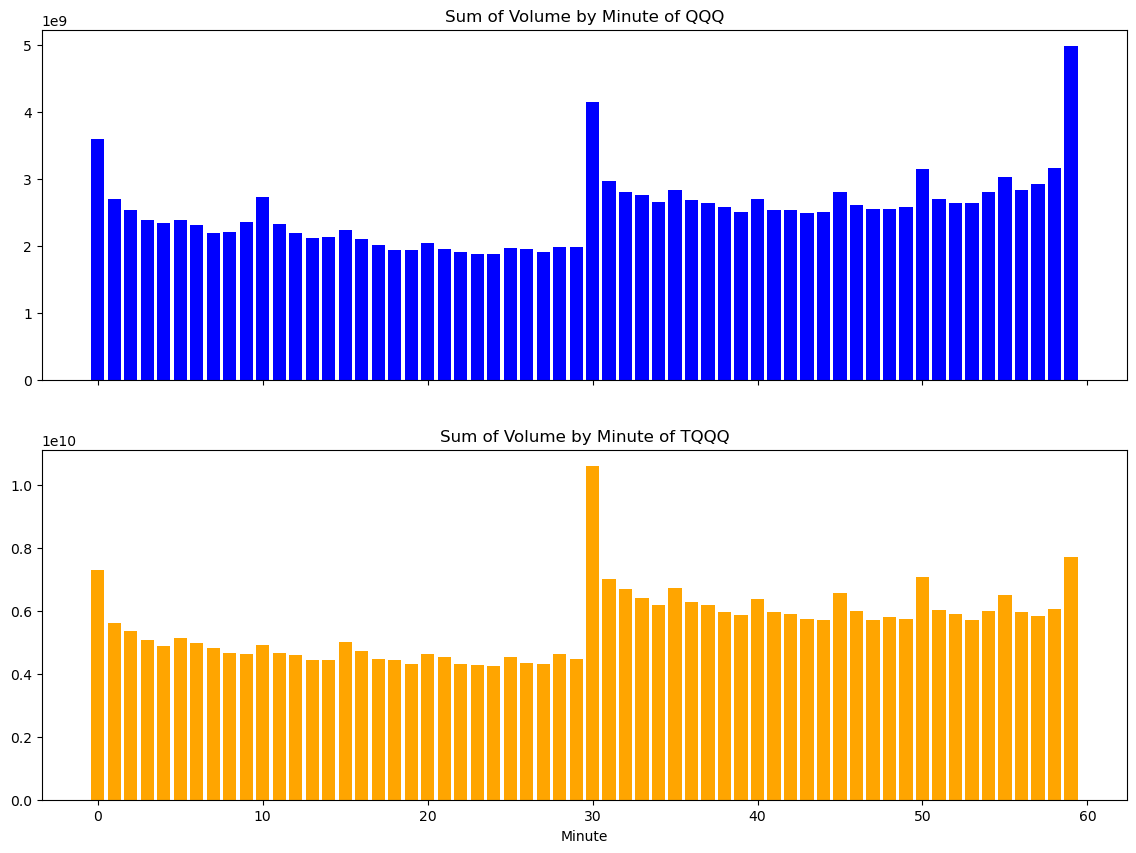

In [149]:
# Group df1 and df2 by minute and calculate the sum of Volume
avg_vol_by_minute_df1 = df1.groupby('minute')['Volume'].sum().reset_index()
avg_vol_by_minute_df2 = df2.groupby('minute')['Volume'].sum().reset_index()

# Plot sum of Volume by minute for both tickers (bar plot, two subplots)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].bar(avg_vol_by_minute_df1['minute'], avg_vol_by_minute_df1['Volume'], label=ticker1, color='blue')
axs[0].set_title(f'Sum of Volume by Minute of {ticker1}')
axs[1].bar(avg_vol_by_minute_df2['minute'], avg_vol_by_minute_df2['Volume'], label=ticker2, color='orange')
axs[1].set_title(f'Sum of Volume by Minute of {ticker2}')
plt.xlabel('Minute')
plt.show()

In [ ]:
# import plotly.io as pio
# pio.renderers.default = 'vscode'
# import plotly.graph_objects as go

# # Plot volume profile for df1
# hist1 = go.Histogram(
#     y=df1['Close'],
#     x=df1['Volume'],
#     nbinsy=150,
#     orientation='h',
#     name='Volume Profile',
#     marker_color='#B0C4DE',
#     opacity=0.5,
#     xaxis='x2',
# )

# line1 = go.Scatter(
#     x=df1['Date'],
#     y=df1['Close'],
#     mode='lines',
#     name='Close',
#     marker_color='blue',
#     xaxis='x',
#     yaxis='y',
# )

# fig1 = go.Figure([hist1, line1])

# fig1.update_layout(
#     xaxis=dict(title='Date', anchor='y', domain=[0, 1], showgrid=False, side='bottom'),
#     xaxis2=dict(title='Sum of Volume', overlaying='x', side='top', showgrid=False),
#     yaxis=dict(title='Close Price', showgrid=True),
#     legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
#     height=600,
#     title=f'Volume Profile & {ticker1} Close Prices'
# )

# fig1.show()

# # Plot volume profile for df2
# hist2 = go.Histogram(
#     y=df2['Close'],
#     x=df2['Volume'],
#     nbinsy=150,
#     orientation='h',
#     name='Volume Profile',
#     marker_color='#B0C4DE',
#     opacity=0.5,
#     xaxis='x2',
# )

# line2 = go.Scatter(
#     x=df2['Date'],
#     y=df2['Close'],
#     mode='lines',
#     name='Close',
#     marker_color='orange',
#     xaxis='x',
#     yaxis='y',
# )

# fig2 = go.Figure([hist2, line2])

# fig2.update_layout(
#     xaxis=dict(title='Date', anchor='y', domain=[0, 1], showgrid=False, side='bottom'),
#     xaxis2=dict(title='Sum of Volume', overlaying='x', side='top', showgrid=False),
#     yaxis=dict(title='Close Price', showgrid=True),
#     legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
#     height=600,
#     title=f'Volume Profile & {ticker2} Close Prices'
# )

# fig2.show()

In [151]:
# ----------------------------------------------------------------------
# VWAP analysis for both tickers
# ----------------------------------------------------------------------

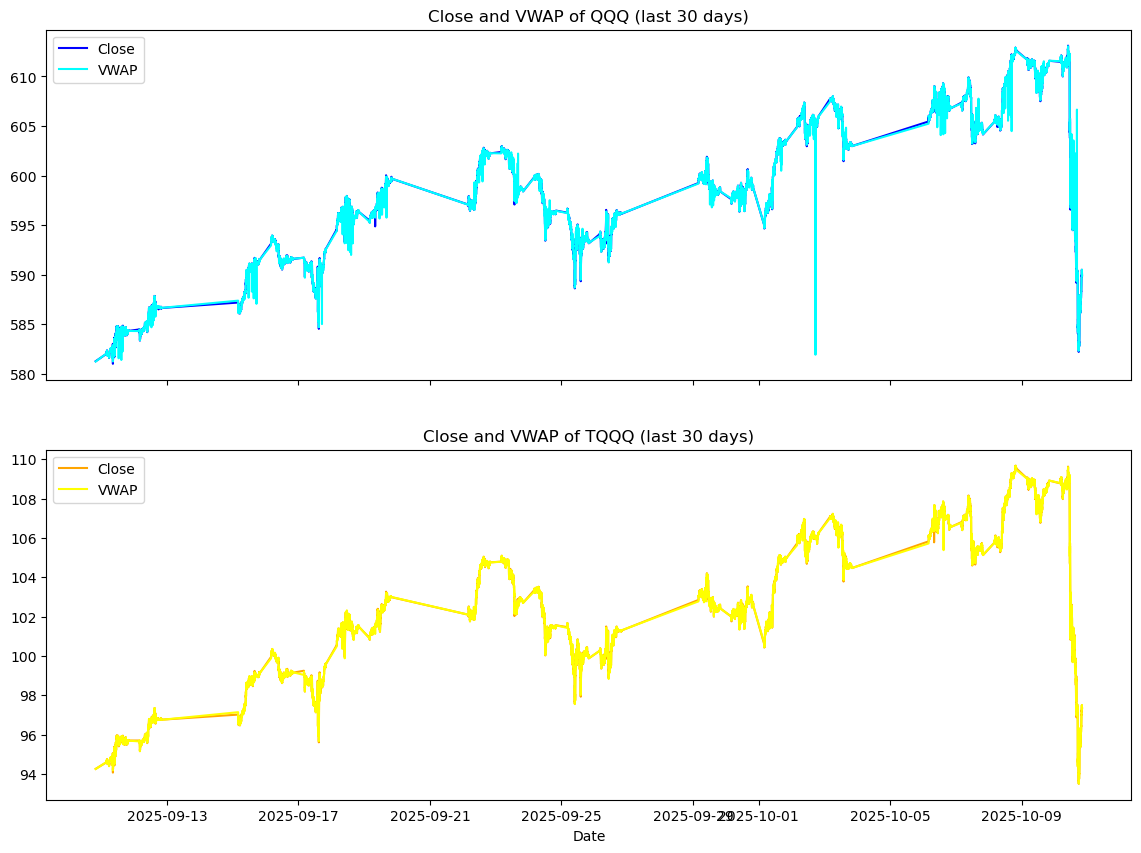

In [152]:
# Filter df1_last_180 and df2_last_180 keeping last 30 days only
end_date_180 = max(df1_last_180['Date'].max(), df2_last_180['Date'].max())
start_date_30 = end_date_180 - pd.Timedelta(days=30)
df1_last_30 = df1_last_180[(df1_last_180['Date'] >= start_date_30) & (df1_last_180['Date'] <= end_date_180)]
df2_last_30 = df2_last_180[(df2_last_180['Date'] >= start_date_30) & (df2_last_180['Date'] <= end_date_180)]

# Plot Close and VWAP for df1 and df2, line charts with subplots (last 30 days only for visualization purposes)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].plot(df1_last_30['Date'], df1_last_30['Close'], label='Close', color='blue')
axs[0].plot(df1_last_30['Date'], df1_last_30['VWAP'], label='VWAP', color='cyan')
axs[0].set_title(f'Close and VWAP of {ticker1} (last 30 days)')
axs[0].legend()
axs[1].plot(df2_last_30['Date'], df2_last_30['Close'], label='Close', color='orange')
axs[1].plot(df2_last_30['Date'], df2_last_30['VWAP'], label='VWAP', color='yellow')
axs[1].set_title(f'Close and VWAP of {ticker2} (last 30 days)')
axs[1].legend()
plt.xlabel('Date')
plt.show()

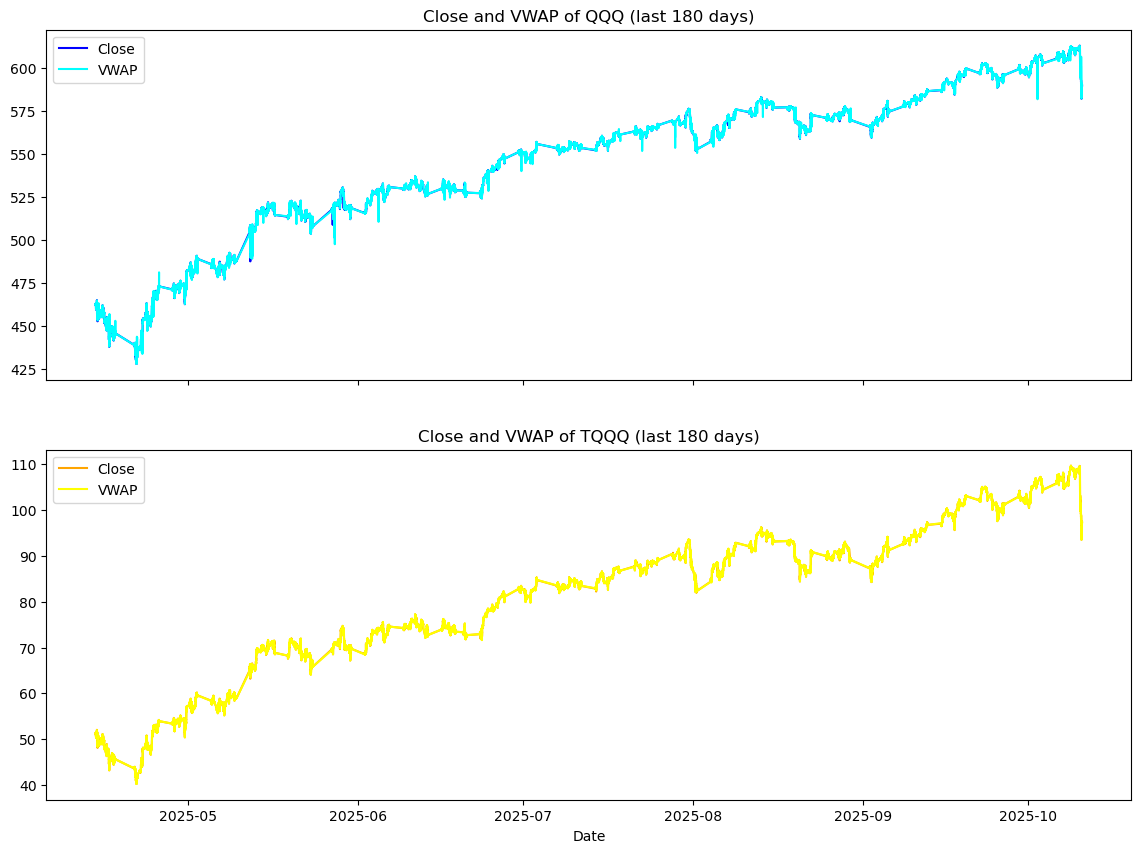

In [153]:
# Plot Close and VWAP for df1 and df2, line charts with subplots (last 180 days ony for visualization purposes)
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
axs[0].plot(df1_last_180['Date'], df1_last_180['Close'], label='Close', color='blue')
axs[0].plot(df1_last_180['Date'], df1_last_180['VWAP'], label='VWAP', color='cyan')
axs[0].set_title(f'Close and VWAP of {ticker1} (last 180 days)')
axs[0].legend()
axs[1].plot(df2_last_180['Date'], df2_last_180['Close'], label='Close', color='orange')
axs[1].plot(df2_last_180['Date'], df2_last_180['VWAP'], label='VWAP', color='yellow')
axs[1].set_title(f'Close and VWAP of {ticker2} (last 180 days)')
axs[1].legend()
plt.xlabel('Date')
plt.show()

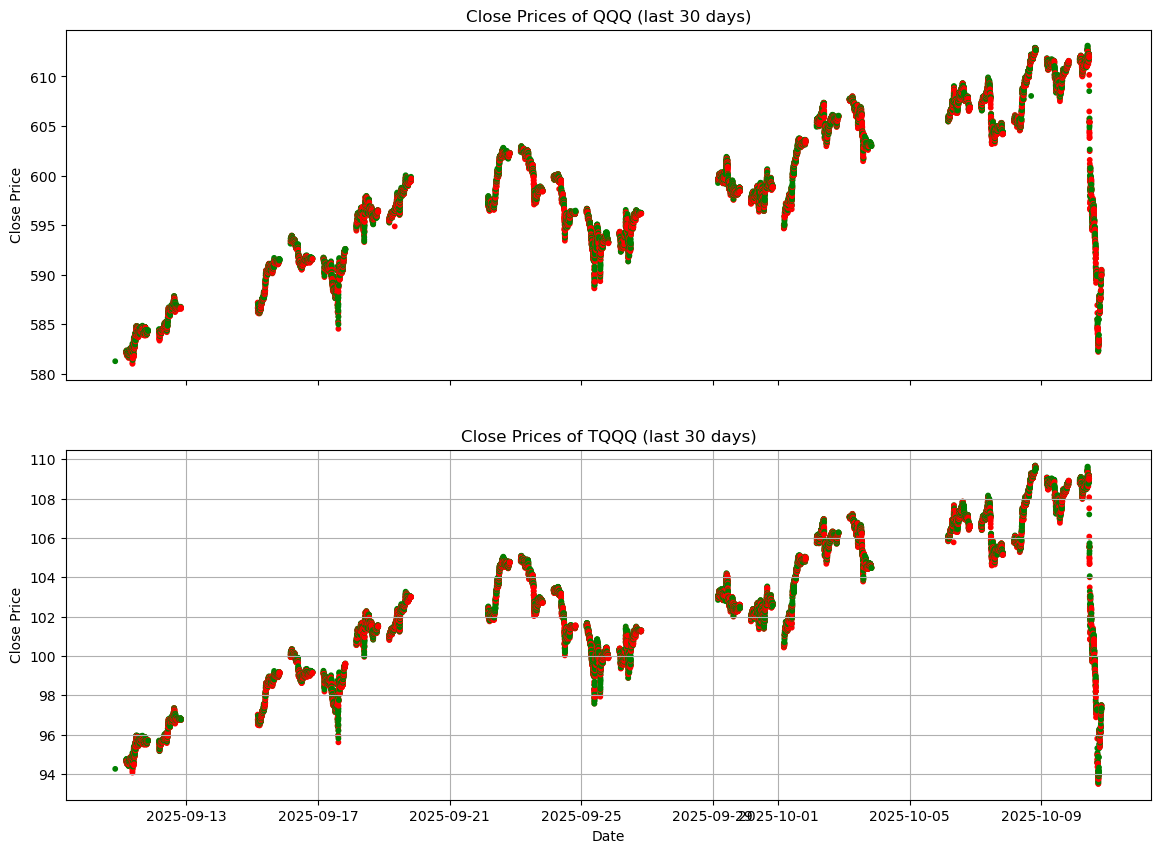

In [154]:
# plot Close prices for both df1_last_30 and df2_last_30, two subplots, 
# with green color where Close > VWAP, red otherwise
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
ax1.scatter(df1_last_30['Date'], df1_last_30['Close'], 
            c=np.where(df1_last_30['vwap_signal'] == 1, 'green', 'red'), s=10)
ax1.set_title(f'Close Prices of {ticker1} (last 30 days)')
ax1.set_ylabel('Close Price')
ax2.scatter(df2_last_30['Date'], df2_last_30['Close'], 
            c=np.where(df2_last_30['vwap_signal'] == 1, 'green', 'red'), s=10)
ax2.set_title(f'Close Prices of {ticker2} (last 30 days)')
ax2.set_ylabel('Close Price')
plt.xlabel('Date')
plt.grid()
plt.show()

In [155]:
# # Plot year column and N column for both df1 and df2, two subplots each
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
# ax1.bar(df1['year'], df1['N'], color='blue')    
# ax1.set_title(f'Number of Trades (N) by Year for {ticker1}')
# ax1.set_ylabel('Number of Trades (N)')
# ax2.bar(df2['year'], df2['N'], color='orange')    
# ax2.set_title(f'Number of Trades (N) by Year for {ticker2}')
# ax2.set_ylabel('Number of Trades (N)')
# plt.xlabel('Year')
# plt.show()